# ECS766P Data Mining Coursework 1

## Table of Contents

- Section 1 - Exploratory Analysis of Categorical and Numerical Features
  - 1.1 Load the Wine Dataset
  - 1.2 Categorical Feature
  - 1.3 Univariate and Multivariate Summaries
  - 1.4 Median by Categorical Grouping
  - 1.5 Scatter Plot of Most Correlated Numerical Pair
- Section 2 - Binning Techniques
  - 2.1 Sales Data
  - 2.2 Equal-Frequency Binning
  - 2.3 Smoothing by Bin Boundaries
- Section 3 - Data Cleaning and Preprocessing
  - 3.1 Load the Country Income Dataset
  - 3.2 Data Cleaning (NaN to Mean)
  - 3.3 Data Cleaning (Categorical to Numerical)
- Section 4 - Exploring Feature Correlations and Relationships
  - 4.1 Load the Shoe Size Dataset
  - 4.2 Scatterplots: Shoe Size vs Height (Male & Female)
  - 4.3 Pearsons Correlation: Shoe Size vs Height (Male & Female
- Section 5 - Principal Component Analysis (PCA)
  - 5.1 PCA without Standardization
  - 5.2 PCA with Standardization
- Section 6 - Interpreting Distance Matrices in Data Visualization
  - 6.1 Load the Graduation Rate Dataset
  - 6.2 Compute and Interpret Distance Matrices Heatmaps
- Section 7 - Cube Model
  - 7.1 Create a JSON File
  - 7.2 Data Cleaning and Database Integration for Cube Modeling
  - 7.3 Create a Data Cube
  - 7.4 Income Aggregate Functions in the Data Cube Model
- Section 8 - 1-Nearest Neighbor Classification with Euclidean Distance
  - 8.1 Hypothetical Dataset
  - 8.2 Classify the Observation $x_3 = (3,2)$
  - 8.3 Classify the Observation $x_4 = (0,1)$                                          

## Section 1: Exploratory Analysis of Categorical and Numerical Features

### 1.1 Load the Wine Dataset

In [9]:
#import packages
import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

#load dataset
wine_data = load_wine()
wine = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine['target'] = pd.Series(wine_data.target)

### 1.2 Categorical Feature 

This section identifies the categorical feature in the wine dataset and computes its frequency.

In [12]:
#find categorical feature and change type
print('Wine Data Frame:')
display(wine.head()) #displays first few rows to understand each variable
print('\nInformation:')
display(wine.info()) #displays info to identify each variables data type

print('\nTarget Categories:')
print(wine['target'].unique()); #displays targets unique categories

Wine Data Frame:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0



Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    floa

None


Target Categories:
[0 1 2]


The categorical feature within the wine dataset is ‘target’. This is seen through the df.head() output, which shows the first rows to all exhibit the same target value of 0, hinting at a type of category. Although the target variable’s data type is presented as ‘int64’ through the df.info() output, the variable represents distinct categories (classes or types of wine) rather than continuous numerical values. This is further confirmed through the df['target'].unique() output which shows target has three categories: 0, 1 and 2.

In [14]:
#convert the 'target' column in the data frame to a categorical data type
#order the categorical values to numerical ascending order
wine['target'] = pd.Categorical(wine['target'], ordered=True)

print('Frequency of each category within target:')
#compute relative frequency by dividing each value in target with len(df)
#keep order here as highest to lowest frequency
frequency = pd.DataFrame(wine['target'].value_counts()/len(wine))
frequency.columns = ['Frequency']
display(frequency) #display frequency table

Frequency of each category within target:


,Frequency
target,
1,0.398876
0,0.331461
2,0.269663


The relative frequency of each category within the target variable shows category 1 has the highest representation of around 39.9% of the data, followed by category 0 with around 33.1% and category 2 with the smallest proportion of around 26.97%. This distribution suggests that category 1 is the most common and category 2 is the least in the wine dataset.

### 1.3 Univariate and Multivariate Summaries

Univariate statistics analyse a single variable independently and are essential for intial data exploration, providing insight into a variable's behavouir and variability. The following code displays the mean and standard deviation for all numerical columns:

In [17]:
print('Univariate Summaries:')
print('\nMean:')
display(pd.DataFrame(wine.mean(numeric_only=True), columns=['Mean'])) 

print('Standard Deviation:')
display(pd.DataFrame(wine.std(numeric_only=True), columns=['Standard Deviation']))

#numeric_only to avoid categorical variables which would return an error
#not wine.describe() as prints all univariate summaries, only need two

Univariate Summaries:

Mean:


,Mean
alcohol,13.000618
malic_acid,2.336348
ash,2.366517
alcalinity_of_ash,19.494944
magnesium,99.741573
total_phenols,2.295112
flavanoids,2.029270
nonflavanoid_phenols,0.361854
proanthocyanins,1.590899
color_intensity,5.058090


Standard Deviation:


,Standard Deviation
alcohol,0.811827
malic_acid,1.117146
ash,0.274344
alcalinity_of_ash,3.339564
magnesium,14.282484
total_phenols,0.625851
flavanoids,0.998859
nonflavanoid_phenols,0.124453
proanthocyanins,0.572359
color_intensity,2.318286


The mean and standard deviation summaries provides insight into the distribution variability across the data. For example, the mean alcohol content of 13.0 with a standard deviation of 0.81 indicates that on average, wines have an alcohol level close to 13% with low variability around this average.

Multivariate statistics analyse relationships between two or more variables and are essential for understanding how features interact, providing insight into dependencies and patterns between them. The following code displays the correlation and covariance for all numerical columns:

In [259]:
print('Multivariate Summaries:')
print('\nCorrelation:')
display(wine.corr(numeric_only=True))

print('Covariance:')
display(wine.cov(numeric_only=True))

Multivariate Summaries:

Correlation:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


Covariance:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,0.659062,0.085611,0.047115,-0.841093,3.139878,0.146887,0.192033,-0.015754,0.063518,1.028283,-0.013313,0.041698,164.567185
malic_acid,0.085611,1.248015,0.050277,1.076332,-0.870780,-0.234338,-0.458630,0.040733,-0.141147,0.644838,-0.143326,-0.292447,-67.548867
ash,0.047115,0.050277,0.075265,0.406208,1.122937,0.022146,0.031535,0.006358,0.001516,0.164654,-0.004682,0.000762,19.319739
alcalinity_of_ash,-0.841093,1.076332,0.406208,11.152686,-3.974760,-0.671149,-1.172083,0.150422,-0.377176,0.145024,-0.209118,-0.656234,-463.355345
magnesium,3.139878,-0.870780,1.122937,-3.974760,203.989335,1.916470,2.793087,-0.455563,1.932832,6.620521,0.180851,0.669308,1769.158700
total_phenols,0.146887,-0.234338,0.022146,-0.671149,1.916470,0.391690,0.540470,-0.035045,0.219373,-0.079998,0.062039,0.311021,98.171057
flavanoids,0.192033,-0.458630,0.031535,-1.172083,2.793087,0.540470,0.997719,-0.066867,0.373148,-0.399169,0.124082,0.558262,155.447492
nonflavanoid_phenols,-0.015754,0.040733,0.006358,0.150422,-0.455563,-0.035045,-0.066867,0.015489,-0.026060,0.040121,-0.007471,-0.044469,-12.203586
proanthocyanins,0.063518,-0.141147,0.001516,-0.377176,1.932832,0.219373,0.373148,-0.026060,0.327595,-0.033504,0.038665,0.210933,59.554334
color_intensity,1.028283,0.644838,0.164654,0.145024,6.620521,-0.079998,-0.399169,0.040121,-0.033504,5.374449,-0.276506,-0.705813,230.767480


The correlation and covariance summaries show the strength and direction of relationships between features. For example, total phenols and flavonoids have a high positive correlation of 0.86 and a covariance of 0.998, indicating that as one increases the other also increases and the strong covariance suggests a large shared variance between these two variables.

### 1.4 Median by Categorical Grouping

This section calculates the median of each numerical feature, grouped by the target categorical feature.

In [22]:
print('Median for each numerical feature grouped by target:')
display(wine.groupby('target', observed=True).median()) 
#wine.groupby('target') groups data by categorical variable, ensuring each category is considered independently
#median() calculates median for the rest of the columns within each target group

Median for each numerical feature grouped by target:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
target,,,,,,,,,,,,,
0,13.750,1.770,2.44,16.8,104.0,2.800,2.980,0.29,1.870,5.40,1.070,3.17,1095.0
1,12.290,1.610,2.24,20.0,88.0,2.200,2.030,0.37,1.610,2.90,1.040,2.83,495.0
2,13.165,3.265,2.38,21.0,97.0,1.635,0.685,0.47,1.105,7.55,0.665,1.66,627.5


This table shows the median values for each numerical feature, grouped by the wine target classes (0, 1, and 2). This is beneficial for understanding the central tendency of each feature within each class and makes interpretations more straight forward, for example:

- Class 0 wines have the highest median in features such as: alcohol (13.75), total_phenols (2.80) and proline (1095.0)
- Class 1 wines have the lowest median in features such as: alcohol content (12.29), colour_intensity (2.90) and proline (495.0)
- Class 2 wines have the highest median in color_intensity (7.55) and the lowest median in flavanoids (0.685) and hue (0.665)

Overall, these median values suggest that certain features such as alcohol content and colour intensity are key in differentiating each target class

### 1.5 Scatter Plot of Most Correlated Numerical Pair

This section identifies the pair of numerical features with the highest correlation through a heat map and then displays a scatter plot to visualise their relationship. 

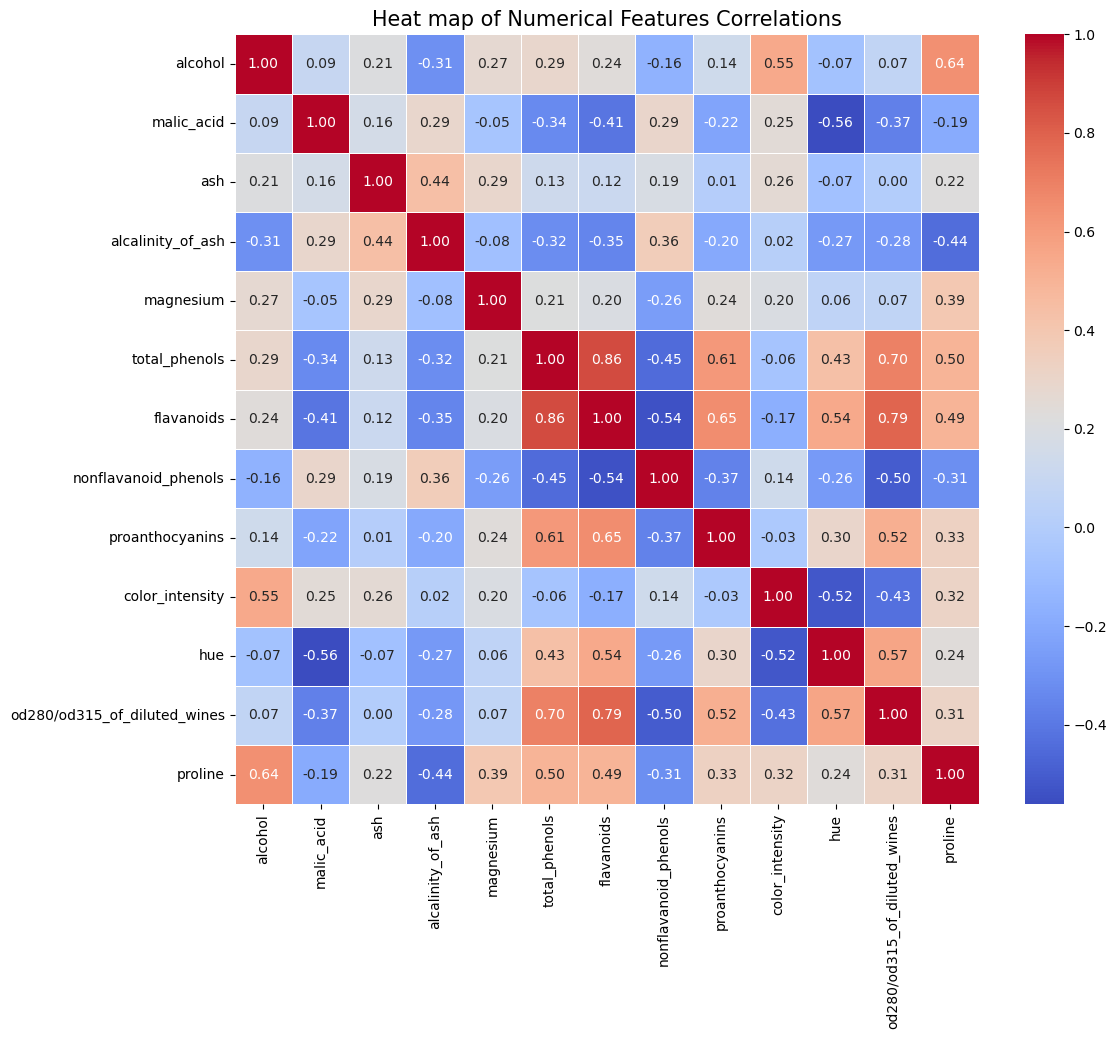

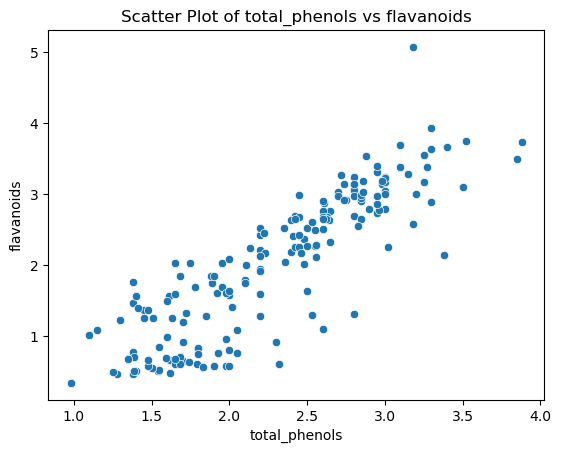

In [241]:
import numpy as np
import seaborn as sns

#store the previously visualised correlation matrix into a variable
correlation_matrix = wine.corr(numeric_only=True)
plt.figure(figsize=(12,10))
#plot a heatmap
sns.heatmap(correlation_matrix, cmap="coolwarm",annot=True, fmt=".2f",linewidths=0.5)
plt.title('Heat map of Numerical Features Correlations', size=15)
plt.show()

#plot scatter plot
sns.scatterplot(x=wine['total_phenols'], y=wine['flavanoids'], data=wine)
plt.title('Scatter Plot of total_phenols vs flavanoids')
plt.show();

The pair of numerical features with the highest correlation is flavanoids and total_phenols with a correlation of 0.86. The scatter plot illustrates a positive correlation, indicating that wines with higher total phenolic content also have higher flavonoid levels. The strong relationship could be useful in distinguishing wine types based on their phenolic and flavonoid content. 

## Section 2: Binning Techniques

### 2.1 Sales Data

[5, 20, 1, 6, 13, 8, 9, 11, 17, 7, 2, 12]

### 2.2 Equal-Frequency Binning 

This section creates equal-frequency binning by first sorting sales data in ascending order, then separating the data into equal bin frequencies, if there are three bins the data is split into four values per bin.


[1, 2, 5, 6, 7, 8, 9, 11, 12, 13, 17, 20]

- Bin 1: 1, 2, 5, 6
- Bin 2: 7, 8, 9, 11
- Bin 3: 12, 13, 17, 20

### 2.3 Smoothing by Bin Boundaries 

This section employs smoothing by bin boundaries where each value is replaced with either the lowest or highest value, depending on which its closest to. If a value is of equal distance, it's rounded to the highest value. 

[1, 2, 5, 6, 7, 8, 9, 11, 12, 13, 17, 20]

- Bin 1: 1, 1, 6, 6
- Bin 2: 7, 7, 11, 11
- Bin 3: 12, 12, 20, 20

## Section 3: Data Cleaning and Preprocessing

### 3.1 Load the Country Income Dataset

In [37]:
country_income = pd.read_csv('country-income.csv')
print('Dataset before replacing NaN values and categorical features:')
display(country_income)

Dataset before replacing NaN values and categorical features:


,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


### 3.2 Data Cleaning (NaN to Mean)

This section replaces any NaN values with the mean value of that feature.

In [40]:
#identify NaN Values and correspponding columns
print('Number of missing values:')
print(country_income.isnull().sum())

#replace the NaN values with the mean of each feature and round to 1 decimal to match others
country_income['Age'] = country_income['Age'].fillna(round(country_income['Age'].mean(),1))
country_income['Income'] = country_income['Income'].fillna(round(country_income['Income'].mean(),1))

#display dataset after replacement
print('\nAfter replacing NaN values to mean values:')
display(country_income)

Number of missing values:
Region            0
Age               1
Income            1
Online Shopper    0
dtype: int64

After replacing NaN values to mean values:


,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,76533.3,Yes
5,India,40.0,69600.0,Yes
6,Brazil,43.8,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


The mean is inputted into row 4, with an income of 76533.3 and row 6, with an age of 43.8. These values ensure consistency within the dataset and helps to avoid removing rows which would in turn reduce the data size. 

### 3.3 Data Cleaning (Categorical to Numerical)

This section replaces any categorical features with numerical features.

In [43]:
from sklearn.preprocessing import LabelEncoder

#define the categorical columns
categorical_columns = ['Region','Online Shopper']

#convert categorical columns to numerical using LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    country_income[col] = label_encoder.fit_transform(country_income[col])

#display dataset after replacement
print('After replacing categorical features with numerical features:')
display(country_income)

After replacing categorical features with numerical features:


,Region,Age,Income,Online Shopper
0,1,49.0,86400.0,0
1,0,32.0,57600.0,1
2,2,35.0,64800.0,0
3,0,43.0,73200.0,0
4,2,45.0,76533.3,1
5,1,40.0,69600.0,1
6,0,43.8,62400.0,0
7,1,53.0,94800.0,1
8,2,55.0,99600.0,0
9,1,42.0,80400.0,1


Region values are now represented as integers (0,1,2) which correspond to a specific region (Brazil, India, USA) and Online Shopper has been converted into binary, with 0 representing 'No' and 1 represening 'Yes'. Relpacing the categorical features with numerical ones allow for easier computations and machine learning modelling.

## Section 4: Exploring Feature Correlations and Relationships

### 4.1 Load the Shoe Size Dataset

In [46]:
shoe_size = pd.read_csv('shoesize.csv')
print('Shoe size dataset:')
display(shoe_size)

Shoe size dataset:


,Index,Gender,Size,Height
0,1,F,5.5,60.0
1,2,F,6.0,60.0
2,3,F,7.0,60.0
3,4,F,8.0,60.0
4,5,F,8.0,60.0
...,...,...,...,...
403,404,M,13.0,78.0
404,405,M,13.0,78.0
405,406,M,14.0,78.0
406,407,M,15.0,80.0


### 4.2 Scatterplots: Shoe Size vs Height (Male & Female)

This section plots the scatterplots of shoe size against height for both male and females separately.

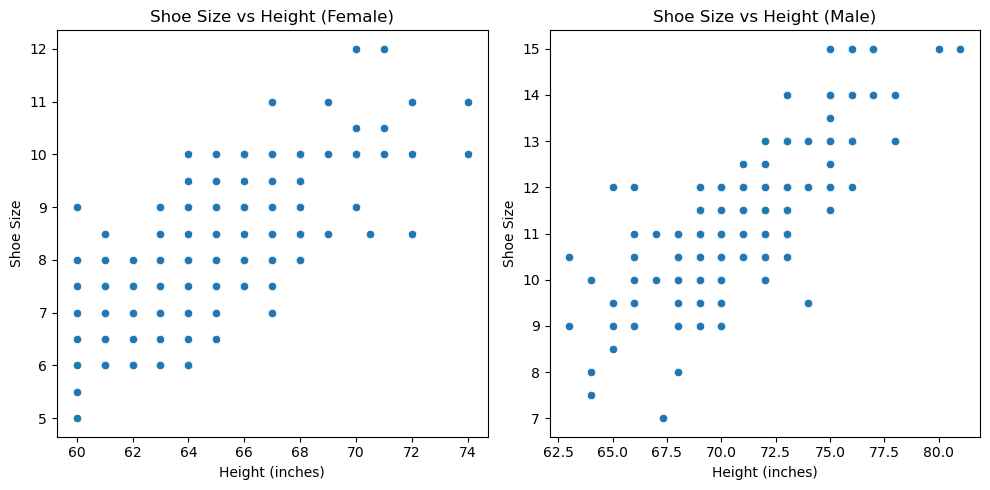

In [49]:
plt.figure(figsize=(10, 5))

#plot subplots to have graphs next to eachother for easy interpretation
plt.subplot(1,2,1)
#plot only female using 'Gender'=='F'
#shoe size vs height label on axis
sns.scatterplot(x='Height', y='Size', data=shoe_size[shoe_size['Gender']=='F']) 
plt.title('Shoe Size vs Height (Female)')
plt.xlabel('Height (inches)')
plt.ylabel('Shoe Size')

plt.subplot(1,2,2)
#plot only female using 'Gender'=='M'
sns.scatterplot(x='Height', y='Size', data=shoe_size[shoe_size['Gender']=='M'])
plt.title('Shoe Size vs Height (Male)')
plt.xlabel('Height (inches)')
plt.ylabel('Shoe Size')

plt.tight_layout()
plt.show()

The scatter plots show a positive relationship between height and shoe size for both men and women. Overall, the scatter plot represeting males shows a slightly stronger relationship between height and shoe size compared to females. This suggests that on average, taller people tend to have larger shoe sizes with this being more pronounced in males compared to females. 

### 4.3 Pearson's Correlation: Shoe Size vs Height (Male & Female)

This section computes Pearson's correlation coeffiicents of shoe size against height for both male and females separately.

In [53]:
female = shoe_size[shoe_size['Gender']=='F']
#.corr height against shoe size for just female
female_corr = female['Height'].corr(female['Size'])
print('Pearsons correlation coefficient (female):', female_corr)

male = shoe_size[shoe_size['Gender']=='M']
#.corr height against shoe size for just male
male_corr = male['Height'].corr(male['Size'])
print('Pearsons correlation coefficient (male):', male_corr)

Pearsons correlation coefficient (female): 0.7078119417143997
Pearsons correlation coefficient (male): 0.7677093547300968


The Pearson correlation coefficients for height and shoe size show a strong positive correlation (close to 1) in both male and females, consistent with the scatter plot interpretations. The correlation is slightly stronger in males (0.77) compared with females (0.71) which suggests shoe size is more constistently related to height in males.

## Section 5: Principal Component Analysis (PCA)

### PCA without Standardization

This section performs PCA with two components on the wine dataset to reduce dimensionality and visualise class separations based on variance.

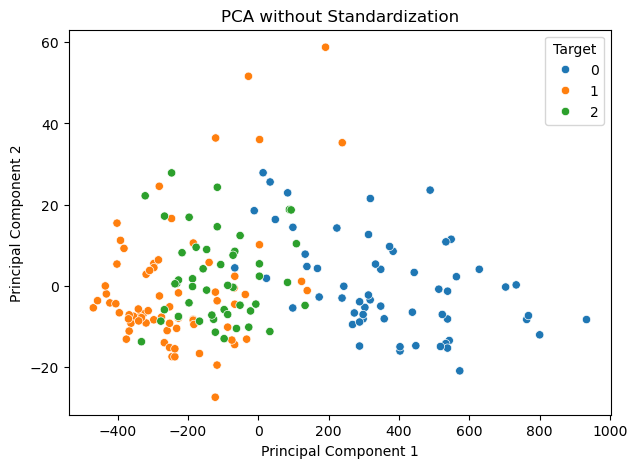

In [58]:
from sklearn.decomposition import PCA

#separate features and target
X = wine.drop(columns=['target'])
y = wine['target']

#PCA without standardization
X_pca = PCA(n_components=2).fit_transform(X)

#convert pca results to dataframe for scatterplot
pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2'])
pca_df['target'] = y

#plot scatterplot for PCA
plt.figure(figsize=(7,5))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette='tab10', legend='full')
plt.title('PCA without Standardization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target')
plt.show()

The scatterplot of the principal components visually shows some separation among the classes (through differing colours) but with noticeable overlap.

- Principal Component 1 (x axis) spreads the classes with some separation and shows the most variance in the data. This can be seen through the orange (class 1) and green (class 2) points being widely distrbuted towards the left side of the plot, whilst the blue points (class 0) are primarily found to the right. However, there isn't a complete separation of the classes as many orange and green points overlap between -400 and 0 on the x-axis making it seem as if they belong to one class, with even some blue points overlapping too.
  
- Based on the scatter plot, the overlap suggests eventhough PCA captured significant variance in the data, it was not sufficient enough to fully distinguish the classes (target). The overlap occurs because PCA maximizes variance without considering class labels and thus focuses on the directions (principal components) with greatest overall variance instead of those that best separate the classes. Although this unsupervised method captures general data structures, it isn't consistent with class distinctions and therefore causes plot overlap.

- One way to allevaite this issue before performing PCA is to standardize the data, this ensures that all features contribtue equally by scaling them to have a mean of 0 and a standard deviation of 1. This prevents dominant features from influencing the principal components disproportionately and may capture a more balanced variance across the featues which may result in better class separation.

### PCA with Standardization

This section performs PCA with two components on the standardized wine dataset to visualise the class separations more effectively, ensuring each feature contributes equally.

In [1]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

#PCA without standardization
X_pca_scaled = PCA(n_components=2).fit_transform(X_scaled)

#convert pca results to dataframe for scatterplot
pca_df_scaled = pd.DataFrame(X_pca_scaled, columns=['PC1','PC2'])
pca_df_scaled['target'] = y
display(pca_df_scaled)

#plot scatterplot for PCA
plt.figure(figsize=(7,5))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df_scaled, palette='tab10', legend='full')
plt.title('PCA with Standardization') 
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target')
plt.show()

NameError: name 'X' is not defined

The scatterplot of the principal components with the standardized data visually shows improved separation among the classes, with significantly less overlap.

- Principal Component 1 (x-axis) still captures the most variance while clearly spreading the classes across the axis. The orange (class 1) and green (class 2) points are more separated in this plot where green is located on the left and orange in the middle which wasn't clearly distinguishable before. The blue points (class 0) are still found to the right of the plot but with less spread and more clearly grouped.

- In comparison with the unstandardized PCA plot, this standardized version significantly reduces overlap between the classes and presents more distinguishable colour groups. Although, there remains a slight overlap between the orange and blue points mainly, which confirms that PCA cannot fully seperate the classes on a two-dimensional plot even with standardization.

- Overall, standardizing the data balances the influence of each feature which allows PCA to represent variance more evenly across features. This step improves class separation making the visualisation more clear, yet it doesn't fully resolve overlap which may be due to data complexity and PCA's unsupervised nature.

## Section 6: Interpreting Distance Matrices in Data Visualization

### 6.1 Load the Graduation Rate Datatset

In [65]:
graduation_rate = pd.read_csv('graduation_rate.csv')

education_order = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]

graduation_rate['parental level of education'] = pd.Categorical(
    graduation_rate['parental level of education'], ordered=True, categories=education_order)

graduation_rate_sorted = graduation_rate.sort_values(by='parental level of education', ascending=True)
parental_education_sorted = graduation_rate_sorted['parental level of education']

X = graduation_rate_sorted.drop(columns='parental level of education').to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

### 6.2 Compute and Interpret Distance Matrices Heatmaps

This section interprets distance matrices heatmaps on the graduation rate dataset to show that students with parents having a master's degree have a greater average distance from those with parents who only have some high school education.

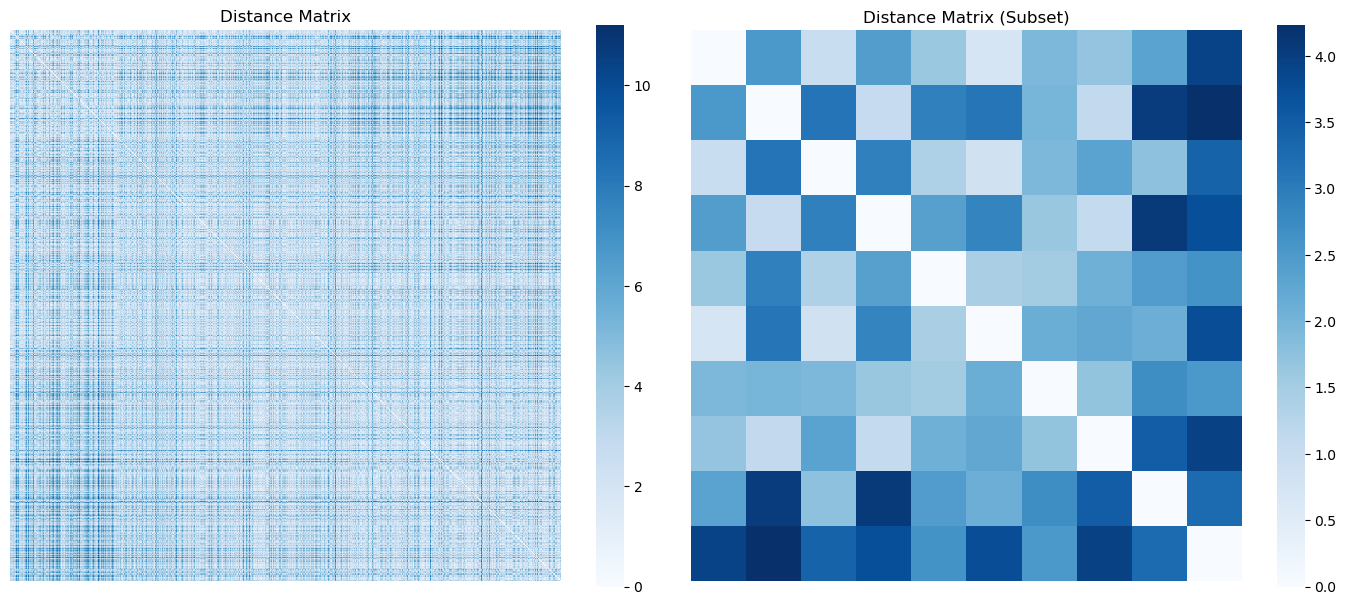

In [186]:
from scipy.spatial import distance

#calculate pairwise distances
dist = distance.squareform(distance.pdist(X))

#select the first 10 records from the dataset for analysis
X_subset = X[:10, :]
#calculate pairwise distances for the selected 10 records
dist_subset = distance.squareform(distance.pdist(X_subset))

#plot two heatmaps next to eachother for easy interpretation
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.heatmap(dist, square=True, xticklabels=False, yticklabels=False,cmap='Blues', ax=axes[0])  
axes[0].set_title('Distance Matrix')

sns.heatmap(dist_subset, square=True, xticklabels=False, yticklabels=False, cmap='Blues', ax=axes[1])
axes[1].set_title('Distance Matrix (Subset)')

plt.tight_layout()
plt.show()

The heatmaps indicate that students with parents who have a master's degree have a greater average distance from other students compared to those whose parents have only some high school education. This inference is possible because the visualisations use color intensity to represent Euclidean distances, lighter colors show students who are closer and more similar, while darker colors indicate greater distances between students with differing parental education levels. Since the data was sorted by parental education level from 'some high school' to 'master's degree', students with similar backgrounds appear near each other in the distance matrix with lighter colors and those with differing backgrounds show darker colors.

## Section 7: Cube Model

### 7.1 Create a JSON File 

This section creates a JSON file for the data cube model, using region, age, and online shopper fields as dimensions and income as the measure. The aggregate functions are also defined as total income,
average income, minimum income, and maximum income.

In [71]:
import json

#define data cube model with dimensions and aggregations
income_model = {
    "dimensions": [
        { 
            "name": "Region",
            "attributes": ["Region"] 
        },
        { 
            "name": "Age",
            "attributes": ["Age"] 
        },
        {
            "name": "Online_Shopper",
            "attributes": ["Online_Shopper"]
        }
    ],
    
    "cubes": [
        {
            "name": "country_income",
            "dimensions": ["Region", "Age", "Online_Shopper"], #set cube dimensions
            "measures": [
                {
                    "name": "Income",
                    "label": "Income"
                }
            ],
            "aggregates": [ #define aggregate functions for income (the measure)
                {
                    "name": "total_income",
                    "function": "sum",
                    "measure": "Income"
                },
                {
                    "name": "average_income",
                    "function": "avg",
                    "measure": "Income"
                },
                {
                    "name": "minimum_income",
                    "function": "min",
                    "measure": "Income"
                },
                {
                    "name": "maximum_income",
                    "function": "max",
                    "measure": "Income"
                }
            ] 
        }
    ]
}

#save model as json file
with open("income_model.json", "w") as json_file:
    json.dump(income_model, json_file)

### 7.2 Data Cleaning and Database Integration for Cube Modeling

This section cleans the country-income dataset by filling missing values and saves it as a new CSV. The CSV file is then imported into an SQLite database with a table for further analysis in the data cube.

In [ ]:
!pip install --upgrade cubes
!pip install sqlalchemy==1.3.20

In [77]:
from sqlalchemy import create_engine
from cubes.tutorial.sql import create_table_from_csv

#fill NaN values with mean values as seen in section 3, this time leaving categorical variables as is
country_income = pd.read_csv('country-income.csv')
country_income['Age'] = country_income['Age'].fillna(country_income['Age'].mean())
country_income['Income'] = country_income['Income'].fillna(country_income['Income'].mean())

#convert cleaned country_income dataset to a csv file
country_income.to_csv('cleaned_country_income.csv', index=False)

#save the cleaned country_income dataset to an SQLite database for cube analysis
engine = create_engine('sqlite:///country_income.sqlite')

#create table in SQLite using the csv file
create_table_from_csv(engine,
                      "cleaned_country_income.csv",
                      table_name="country_income",
                      fields=[
                          ("Region", "string"),
                          ("Age", "float"),
                          ("Income", "float"),
                          ("Online_Shopper", "string")
                      ],
                      create_id=True
                     )

### 7.3 Create a Data Cube

This section sets up a data cube workspace, connects to the SQLite database, loads the data cube model and sets up a browser to perform aggregations on the data.

In [83]:
from cubes import Workspace
from collections.abc import MutableMapping

#set up Cubes workspace and register the SQLite database
workspace = Workspace()
workspace.register_default_store("sql", url="sqlite:///country_income.sqlite")

#load the model
workspace.import_model("income_model.json")

#create cube
cube = workspace.cube("country_income")

#browser to perform aggregations on the data cube 
browser = workspace.browser(cube)

### 7.4 Income Aggregate Functions in the Data Cube Model

#### 7.4.1 Aggregate Results for the Whole Data Cube

In [274]:
#perform aggregation on the whole data cube
result = browser.aggregate()

#print the aggregate results for the whole data cube
print("Aggregate Results for the Whole Data Cube:\n")
print(f"Total Income: {result.summary['total_income']:.2f}")
print(f"Average Income: {result.summary['average_income']:.2f}")
print(f"Minimum Income: {result.summary['minimum_income']:.2f}")
print(f"Maximum Income: {result.summary['maximum_income']:.2f}")

Aggregate Results for the Whole Data Cube:

Total Income: 765333.30
Average Income: 76533.33
Minimum Income: 57600.00
Maximum Income: 99600.00


Based on the dataset of 10 samples, the total income is 765,333.30 with an avergage income of 765,333.33 and a range of income between 57,600 to 99,600.

#### 7.4.2 Aggregate Results per Region

In [111]:
#perform aggregation on the data cube, drilling down by "Region" attribute
result = browser.aggregate(drilldown=["Region"])

#print the aggregate results categorised by region
print("Aggregate Results per Region:\n")
for record in result:
    print(f"{record['Region']}:")
    print(f"    Total Income: {record['total_income']:.2f}")
    print(f"    Average Income: {record['average_income']:.2f}")
    print(f"    Minimum Income: {record['minimum_income']:.2f}")
    print(f"    Maximum Income: {record['maximum_income']:.2f}")

Aggregate Results per Region:

Brazil:
    Total Income: 193200.00
    Average Income: 64400.00
    Minimum Income: 57600.00
    Maximum Income: 73200.00

India:
    Total Income: 331200.00
    Average Income: 82800.00
    Minimum Income: 69600.00
    Maximum Income: 94800.00

USA:
    Total Income: 240933.30
    Average Income: 80311.10
    Minimum Income: 64800.00
    Maximum Income: 99600.00



The income aggregates by region show that India has the highest total income representing 43.28%, followed by the USA at 31.48% and Brazil with the lowest at 25.24%. The USA has the highest maximum income (99,600) and largest income range (34,280), while Brazil has both the lowest maximum and minimum income, with the smallest income range (15,600).

#### 7.4.3 Aggregate Results per Online Shopping Activity

In [113]:
#perform aggregation on the data cube, drilling down by "Online_Shopper" attribute
result = browser.aggregate(drilldown=["Online_Shopper"])

#print the aggregate results categorised by online shopping activity
print("Aggregate Results per Online Shopping Activity:\n")
for record in result:
    print(f"{record['Online_Shopper']}:")
    print(f"    Total Income: {record['total_income']:.2f}")
    print(f"    Average Income: {record['average_income']:.2f}")
    print(f"    Minimum Income: {record['minimum_income']:.2f}")
    print(f"    Maximum Income: {record['maximum_income']:.2f}")

Aggregate Results per Online Shopping Activity:

No:
    Total Income: 386400.00
    Average Income: 77280.00
    Minimum Income: 62400.00
    Maximum Income: 99600.00

Yes:
    Total Income: 378933.30
    Average Income: 75786.66
    Minimum Income: 57600.00
    Maximum Income: 94800.00



The income by online shopping activity show that individuals that don't shop online have a slightly higher total income, representing 50.49% of the total income compared to 49.49% for those who do shop online. The 'No' group has the highest maximum income (99,600) and the 'Yes' group has the highest minimum income (57,600).

#### 7.4.4 Aggregate Results for People Aged Between 40-50

In [124]:
from cubes import PointCut, Cell, RangeCut

#define a range cut for the "Age" dimension to filter people aged between 40 and 50
age_range_cut = RangeCut("Age", from_path=[40], to_path=[50])
#create a cell, filtered slice of data, with the specified age range cut
cell = Cell(cube, [age_range_cut])
#perform aggregation on the filtered data cube for people aged 40-50
result = browser.aggregate(cell)

#print the aggregate results for the specified age range
print("Aggregate Results for People Aged Between 40-50:\n")
print(f"Total Income: {result.summary['total_income']:.2f}")
print(f"Average Income: {result.summary['average_income']:.2f}")
print(f"Minimum Income: {result.summary['minimum_income']:.2f}")
print(f"Maximum Income: {result.summary['maximum_income']:.2f}")

Aggregate Results for People Aged Between 40-50:

Total Income: 448533.30
Average Income: 74755.55
Minimum Income: 62400.00
Maximum Income: 86400.00


The income aggregates for individuals aged between 40–50 show a total income of 448,533.30, representing 58.61% of the total income in the dataset. This age group has an average income of 74,755.55, with incomes ranging from 62,400 to 86,400. 

## Section 8: 1-Nearest Neighbor Classification with Euclidean Distance

### 8.1 Hypothetical Dataset

Considering a hypothetical dataset with two observations,  this section will explore a 1-nearest neighbor classifier which assigns a new observation $x$ the class label $y_i$ if $x_i$ is the closest observation to $x$ in the dataset. 


- Observation 1: $x_1 = (1,2)$ with class label $y_1 = 1$
- Observation 2: $x_2 = (-1,0)$ with class label $y_2 = 0$

Formula:

- $d = \sqrt{(xa-xb)^2 + (ya-yb)^2}$

### 8.2 Classify the Observation $x_3 = (3,2)$

Calculating the Euclidean distances for $x_3$:

- The Euclidean distance $d$ between $x_3 = (3,2)$ and $x_1 = (1,2)$:

  $d(x_3,x_1) = \sqrt{(3-1)^2 + (2-2)^2} = \sqrt{2^2+0^2} = \sqrt{4}  = 2$

- The Euclidean distance $d$ between $x_3 = (3,2)$ and $x_2 = (-1,0)$:

  $d(x_3,x_2) = \sqrt{(3-(-1))^2 + (2-0)^2} = \sqrt{4^2+2^2} = \sqrt{16+4}  = \sqrt{20} \approx 4.47$

In summary, $x_1$ has the closest observation to $x_3$ with a distance of 2, with $x_1$ having a class label $y_1 = 1$, the 1-nearest neighbor classifier assigns $x_3$ to class 1.

### 8.3 Classify the Observation $x_4 = (0,1)$

Calculating the Euclidean distances for $x_4$:

- The Euclidean distance $d$ between $x_4 = (0,1)$ and $x_1 = (1,2)$:

  $d(x_4,x_1) = \sqrt{(0-1)^2 + (1-2)^2} = \sqrt{(-1)^2+(-1)^2} = \sqrt{1+1}  = \sqrt{2} \approx 1.41$

- The Euclidean distance $d$ between $x_4 = (0,1)$ and $x_2 = (-1,0)$:

  $d(x_4,x_2) = \sqrt{(0-(-1))^2 + (1-0)^2} = \sqrt{1^2+1^2} = \sqrt{1+1}  = \sqrt{2} \approx 1.41$

In summary, both $x_1$ and $x_2$ are equally close to $x_4$ with a distance of approximately 1.41. This can either be handled with random selection or a defined rule (such as choosing the first observation). Following the common approach, the 1-nearest neighbor classifier assigns $x_4$ to the first closest observation $x_1$ ($y_1 = 1$), thus $x_4$ is classified as class 1.
